## Introduction to the Interstellar Medium
### Jonathan Williams

### Figure 6.8: plot allsky map of Halpha emission

#### fits file from http://www.astro.wisc.edu/wham-site/wham-sky-survey/wham-ssm

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.interpolate import griddata
from astropy.io import fits
from astropy.visualization import (ImageNormalize, SqrtStretch, LogStretch, AsinhStretch)
%matplotlib inline

-1.2873282 4498.7256


/anaconda/lib/python3.6/site-packages/astropy/visualization/stretch.py:285: RuntimeWarning: invalid value encountered in log
  np.log(values, out=values)
/anaconda/lib/python3.6/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


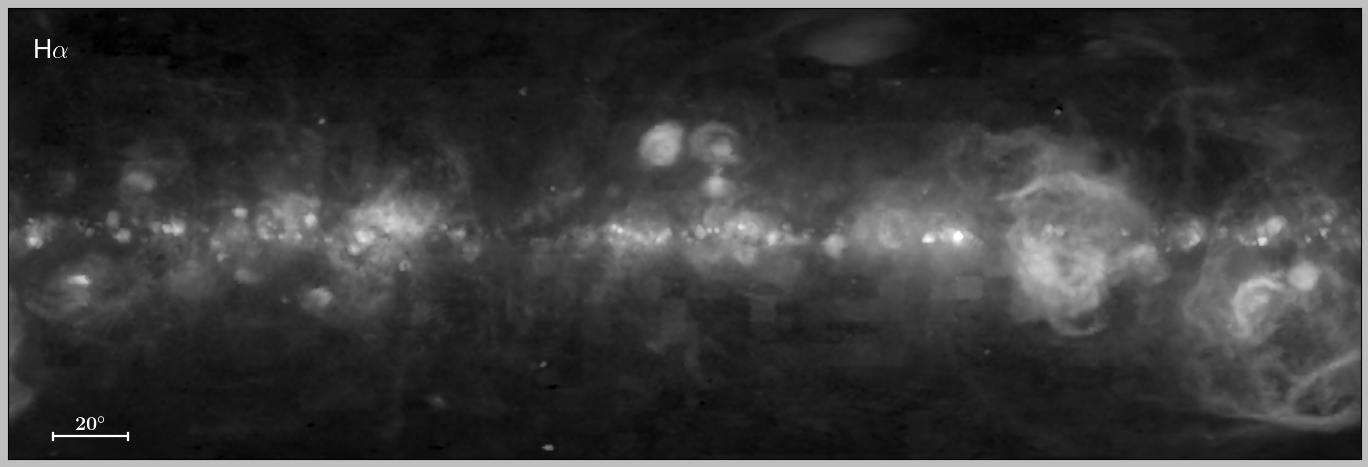

In [29]:
hdu = fits.open('wham.fits')
im = hdu[0].data
hd = hdu[0].header

# crop between lat -60 to +60
# each pix is 0.25 deg so 30 deg = 120 pix
imcrop = im[120:601, :]
#print(imcrop.min(),imcrop.max())

plt.style.use('classic')
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)

norm = ImageNormalize(imcrop, vmin=0, vmax=1000, stretch=LogStretch())
ax.imshow(imcrop, cmap='gray', origin='lower', norm=norm) 

# scale bar
dx = hd['CD1_1']
#print(dx)
# 0.25 deg per pixel

ny, nx = imcrop.shape
ax.set_xlim(0,nx-1)
ax.set_ylim(0,ny-1)

xbar = 80
x0 = 48
x1 = x0 + xbar
y0 = 24
dy = 4
ax.plot([x0,x1],[y0,y0], 'w-', lw=2)
ax.plot([x0,x0],[y0-dy,y0+dy], 'w-', lw=2)
ax.plot([x1,x1],[y0-dy,y0+dy], 'w-', lw=2)
mpl.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
ax.text(0.5*(x0+x1), y0+1.7*dy, r'$\boldsymbol{20^\circ}$', color='white', fontsize=18, fontweight='heavy', ha='center')
ax.text(0.02,0.89,r'H$\alpha$', {'color': 'w', 'fontsize': 24}, transform=ax.transAxes)

ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False) 
plt.tight_layout()
plt.savefig('wham.pdf', bbox_inches='tight', pad_inches = 0)